In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import numpy as np
import pandas_profiling as  pp

ModuleNotFoundError: No module named 'pandas_profiling'

In [197]:
import seaborn as sns
import pandas as pd

In [182]:
data=pd.read_csv(r"C:\Users\vipul ghadi\Desktop\ml_Sikho\data_for_ml\insurance.csv")

In [183]:
df=data.copy()

In [184]:
cat_feature=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat_feature.append(i)

In [185]:
num_feature=[]
for i in df.columns:
    if df[i].dtype!="object":
        num_feature.append(i)

<Figure size 360x360 with 0 Axes>

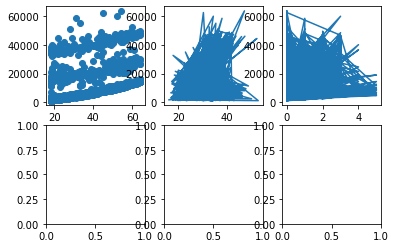

In [186]:
plt.figure(figsize=(5,5))
fig,ax=plt.subplots(2,3)
ax[0][0].scatter(df["age"],df["charges"])
ax[0][1].plot(df["bmi"],df["charges"])
ax[0][2].plot(df["children"],df["charges"])
plt.show()

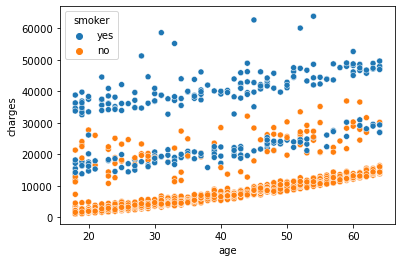

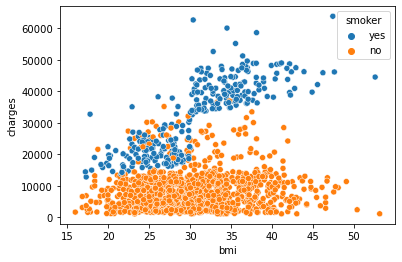

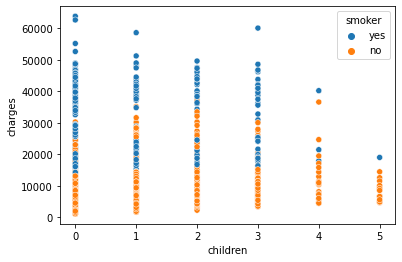

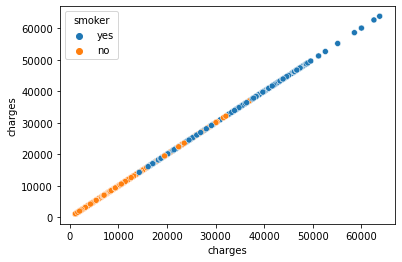

In [187]:
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(num_feature)):
   
    
    sns.scatterplot(x=df[num_feature[i]],y=df["charges"],hue=df["smoker"])
    plt.show()

In [188]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


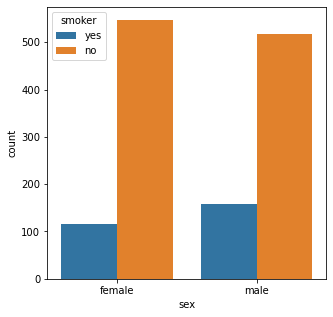

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


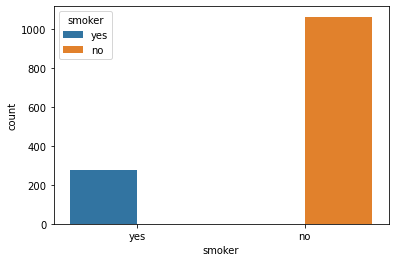

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


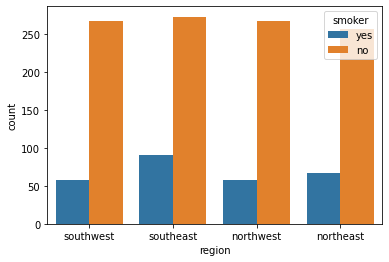

In [189]:
plt.figure(figsize=(5,5))
for i in cat_feature:
    sns.countplot(df[i],hue=df["smoker"])
    plt.show()

In [190]:
df[df["age"]<=18 ].nunique()

age          1
sex          2
bmi         63
children     5
smoker       2
region       2
charges     69
dtype: int64

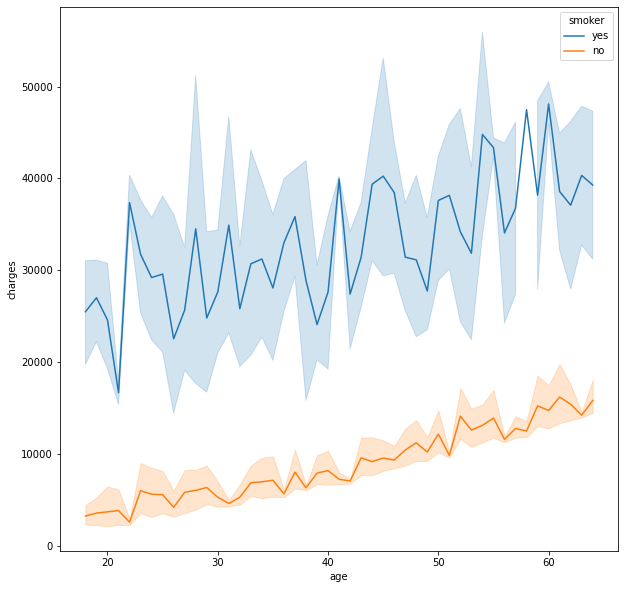

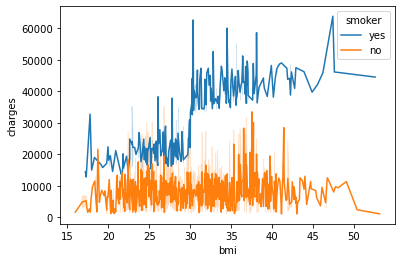

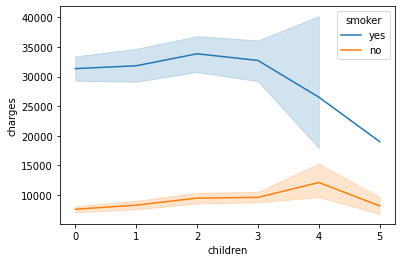

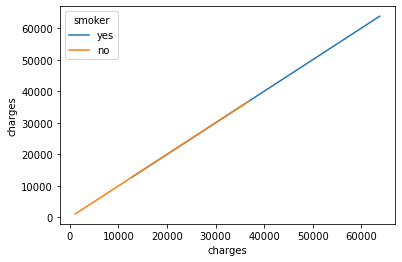

In [191]:

plt.figure(figsize=(10,10))
for i in range(len(num_feature)):
   
    
    sns.lineplot(x=df[num_feature[i]],y=df["charges"],hue=df["smoker"])
    plt.show()

PEOPLE HAVING NO CHILDREN SMOKES IN LARGE AMOUNT

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


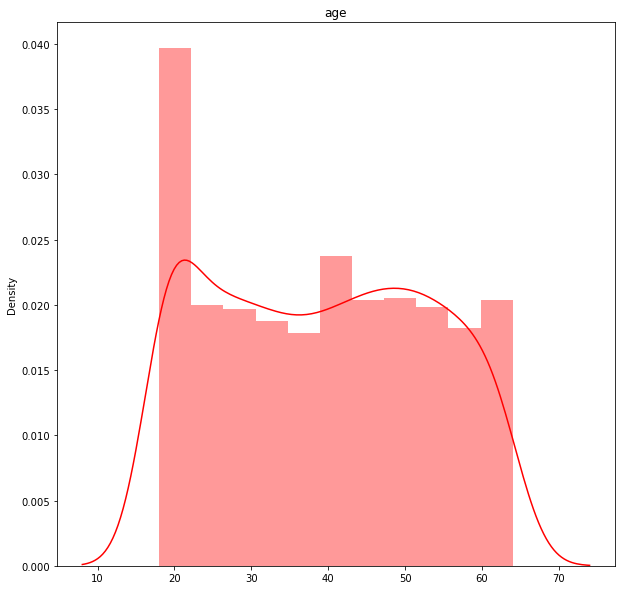

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


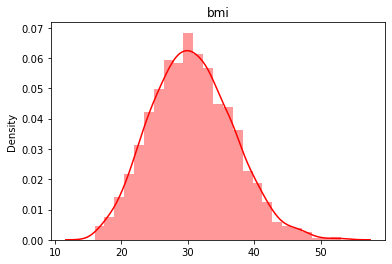

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


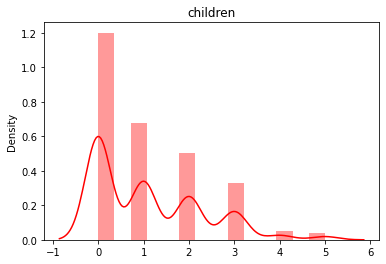

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


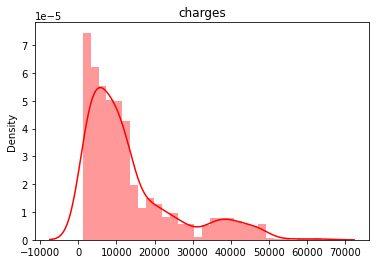

In [192]:

plt.figure(figsize=(10,10))
for i in range(len(num_feature)):
   
    plt.title(num_feature[i])
    sns.distplot(x=df[num_feature[i]],color="red")
    plt.show()

AGE IS NOT NORMALY DISTRIBUTED

CHARGES ALSO HAVE UNEVEN DISTRIBUTION


In [303]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<AxesSubplot:xlabel='charges', ylabel='Count'>

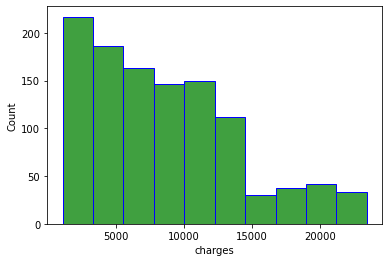

In [304]:
sns.histplot(df["charges"],bins=10,color="green",edgecolor="blue")

# ANALYSING OUTLIERS

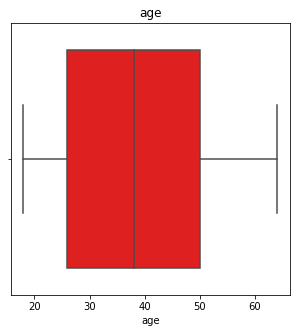

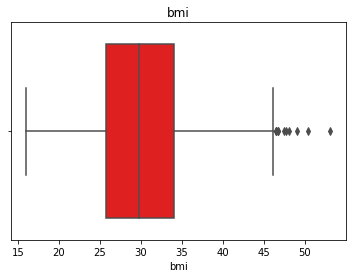

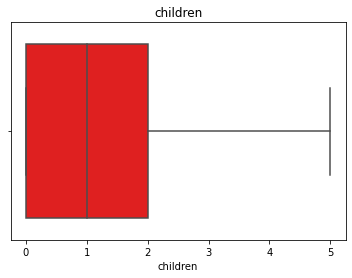

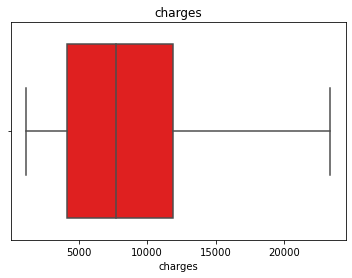

In [305]:
plt.figure(figsize=(5,5))
for i in range(len(num_feature)):
    
    plt.title(num_feature[i])
    
    sns.boxplot(x=df[num_feature[i]],color="red")
   
    plt.show()

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

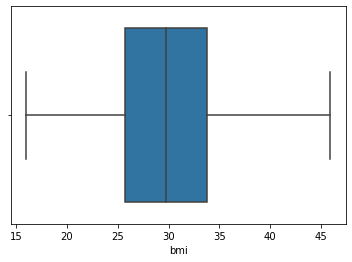

In [314]:
sns.boxplot(df[df.bmi<df.bmi.quantile(.99)]["bmi"])

In [315]:
new_df=df[df.bmi<df.bmi.quantile(.98)]

In [404]:
new_df.children=new_df.children.astype("category")

C:\Users\vipul ghadi\AppData\Local\Temp\ipykernel_28856\3076334951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.children=new_df.children.astype("category")


In [406]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1093 non-null   int64   
 1   sex       1093 non-null   object  
 2   bmi       1093 non-null   float64 
 3   children  1093 non-null   category
 4   smoker    1093 non-null   object  
 5   region    1093 non-null   object  
 6   charges   1093 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 93.3+ KB


In [440]:
dummies=pd.get_dummies(new_df[["sex","children","smoker","region"]])

In [452]:
dummies.reset_index(inplace=True)

In [442]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=scaler.fit_transform(new_df[["age","bmi"]])

In [443]:
scaler=pd.DataFrame(scaler,columns=["age","bmi"])

In [444]:
scaler.reset_index(drop=True)

,age,bmi
0,-1.395252,-0.338131
1,-1.467271,0.696190
2,-0.747077,0.560513
3,-0.386981,-1.253513
4,-0.459000,-0.165450
...,...,...
1088,-1.107174,0.630994
1089,0.837349,0.202817
1090,-1.467271,0.370212
1091,-1.467271,1.238900


In [458]:
y=new_df["charges"]

In [451]:
scaler.reset_index(inplace=True)

In [453]:
final=pd.concat([scaler,dummies],axis=1)

In [455]:
final.isna().sum()

index               0
age                 0
bmi                 0
index               0
sex_female          0
sex_male            0
children_0          0
children_1          0
children_2          0
children_3          0
children_4          0
children_5          0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [497]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [553]:
def Linear(final,y,i):
    X_train,X_test,y_train,y_test=train_test_split(final,y,test_size=.25,random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    print("HOW MY MODEL FITTED TO TRAINING DATA")
    print(100*model.score(X_train,y_train))
    print("HOW MY MODEL FITTED TO TESTING DATA")
    print(100*model.score(X_test,y_test))
  
    print("ACCURACY:",100*r2_score(y_test,model.predict(X_test)))
    return 100*r2_score(y_test,model.predict(X_test)),100*model.score(X_train,y_train),100*model.score(X_test,y_test)
    

In [554]:
scores=[]
training_scores=[]
testing_scores=[]
for i in range(50):
     score,training_score,testing_score=Linear(final,y,random.randint(1,100))
     scores.append(score)
     training_scores.append(training_score)
     testing_scores.append(testing_score)

HOW MY MODEL FITTED TO TRAINING DATA
70.00272782388434
HOW MY MODEL FITTED TO TESTING DATA
70.32569061756374
ACCURACY: 70.32569061756374
HOW MY MODEL FITTED TO TRAINING DATA
74.84135700305885
HOW MY MODEL FITTED TO TESTING DATA
57.56724041366857
ACCURACY: 57.56724041366857
HOW MY MODEL FITTED TO TRAINING DATA
71.84417820605267
HOW MY MODEL FITTED TO TESTING DATA
64.79834581241279
ACCURACY: 64.79834581241279
HOW MY MODEL FITTED TO TRAINING DATA
70.39944660738884
HOW MY MODEL FITTED TO TESTING DATA
68.91980204330136
ACCURACY: 68.91980204330136
HOW MY MODEL FITTED TO TRAINING DATA
73.63550230655483
HOW MY MODEL FITTED TO TESTING DATA
59.15314809495686
ACCURACY: 59.15314809495686
HOW MY MODEL FITTED TO TRAINING DATA
71.01837274350143
HOW MY MODEL FITTED TO TESTING DATA
67.0629883755814
ACCURACY: 67.0629883755814
HOW MY MODEL FITTED TO TRAINING DATA
69.76677211062594
HOW MY MODEL FITTED TO TESTING DATA
70.98590025184728
ACCURACY: 70.98590025184728
HOW MY MODEL FITTED TO TRAINING DATA
71.879

In [555]:
x=np.arange(50)

<AxesSubplot:title={'center':'R2 SCORE VARY WITH RANDOM STATE'}>

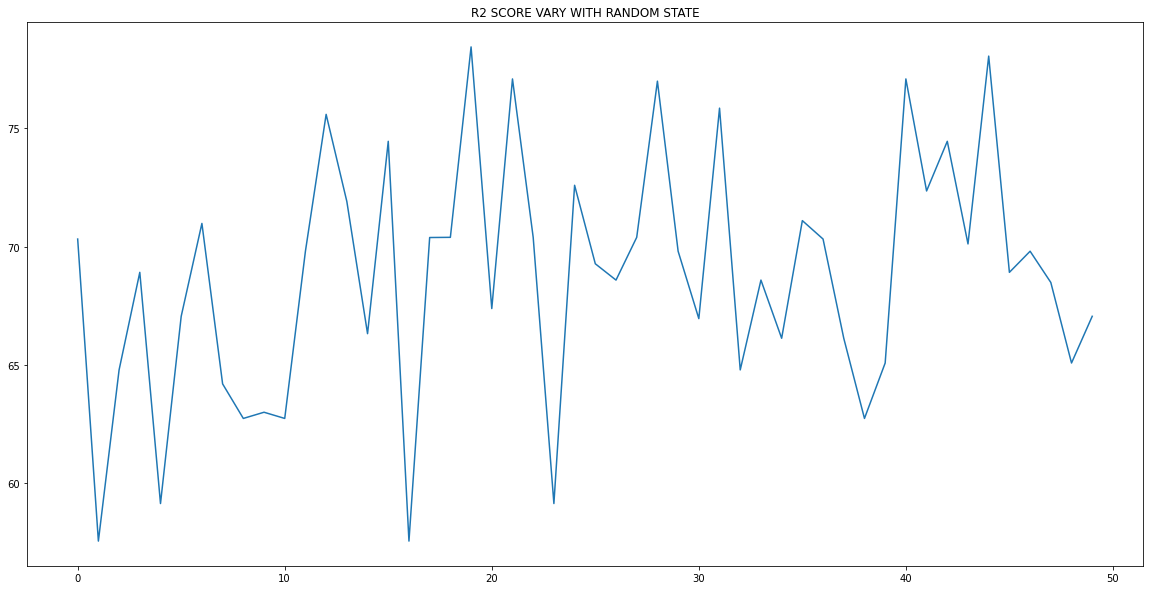

In [556]:
plt.figure(figsize=(20,10))
plt.title("R2 SCORE VARY WITH RANDOM STATE")
sns.lineplot(x=x,y=scores)

# OUR ACCURACY IS NEARLY 70%

In [557]:
np.mean(scores)

68.7465633693814

<AxesSubplot:title={'center':'TRAINIGN VS TESTING ACCURACY'}>

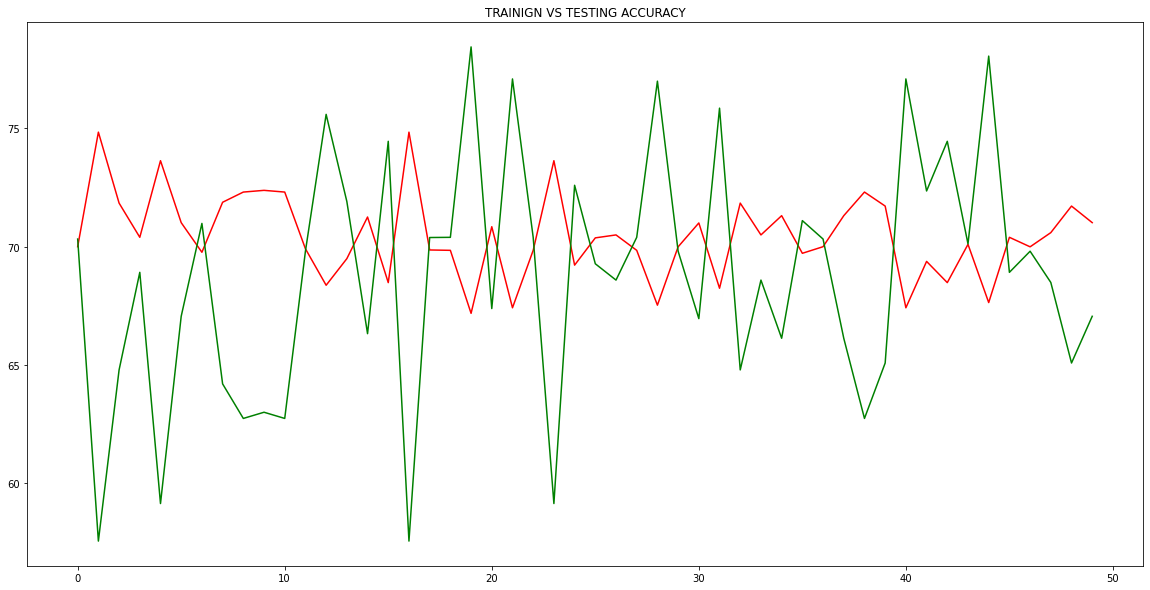

In [561]:
plt.figure(figsize=(20,10))
plt.title("TRAINIGN VS TESTING ACCURACY")
sns.lineplot(x=x,y=training_scores,color="red")
sns.lineplot(x=x,y=testing_scores,color="green")

## USING KNN 

In [571]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [580]:
def KNN(final,y,i):
    X_train,X_test,y_train,y_test=train_test_split(final,y,test_size=.25,random_state=i)
    model=KNeighborsRegressor(algorithm='auto', leaf_size=5, p= 3, weights='uniform')
    model.fit(X_train,y_train)
    print("HOW MY MODEL FITTED TO TRAINING DATA")
    print(100*model.score(X_train,y_train))
    print("HOW MY MODEL FITTED TO TESTING DATA")
    print(100*model.score(X_test,y_test))
  
    print("ACCURACY:",100*r2_score(y_test,model.predict(X_test)))
    
    param={
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "p":[2,3],
    "weights" : ['uniform', 'distance'],
    "leaf_size":np.arange(5,30)}
    #I TRAINED  THE GRIDCV AND GET ABOVE OUTPUT
    #grid=GridSearchCV(model,param,cv=5)
    #grid.fit(X_train,y_train)
    #print(grid.best_params_)
    
    

    #return 100*r2_score(y_test,model.predict(X_test)),100*model.score(X_train,y_train),100*model.score(X_test,y_test)
    

In [582]:
KNN(final,y,i)


HOW MY MODEL FITTED TO TRAINING DATA
19.037297220391057
HOW MY MODEL FITTED TO TESTING DATA
-20.16161383947226
ACCURACY: -20.16161383947226


 I GET VERY BAD SCORE WITH KNN
 
 HOW MY MODEL FITTED TO TRAINING DATA
 
19.037297220391057

HOW MY MODEL FITTED TO TESTING DATA

-20.16161383947226

ACCURACY: -20.16161383947226

## NOW I WILL TRY  DTREE MODEL

In [583]:
from sklearn.tree import DecisionTreeRegressor

In [594]:
def Dtree(final,y,i):
    X_train,X_test,y_train,y_test=train_test_split(final,y,test_size=.25,random_state=i)
    model=DecisionTreeRegressor(criterion= 'absolute_error', max_depth= 7, min_samples_leaf= 6, min_samples_split= 4, splitter= 'random')
    model.fit(X_train,y_train)
    print("HOW MY MODEL FITTED TO TRAINING DATA")
    print(100*model.score(X_train,y_train))
    print("HOW MY MODEL FITTED TO TESTING DATA")
    print(100*model.score(X_test,y_test))
  
    print("ACCURACY:",100*r2_score(y_test,model.predict(X_test)))
    
    param={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
       'splitter':['best', 'random'],
        'max_depth':np.arange(1,15),
        'min_samples_split':np.arange(2,10),
        "min_samples_leaf":np.arange(2,10),
    }
        
                 
    #I TRAINED  THE GRIDCV AND GET ABOVE OUTPUT
    #grid=GridSearchCV(model,param,cv=5)
    #grid.fit(X_train,y_train)
    #print(grid.best_params_)
    return  100*r2_score(y_test,model.predict(X_test)),100*model.score(X_train,y_train),100*model.score(X_test,y_test)
    
    
    
    

In [599]:
dscores=[]
dtraining_scores=[]
dtesting_scores=[]
for i in range(50):
     score,training_score,testing_score=Dtree(final,y,random.randint(1,100))
     dscores.append(score)
     dtraining_scores.append(training_score)
     dtesting_scores.append(testing_score)

HOW MY MODEL FITTED TO TRAINING DATA
67.55330172462347
HOW MY MODEL FITTED TO TESTING DATA
67.76890450738627
ACCURACY: 67.76890450738627
HOW MY MODEL FITTED TO TRAINING DATA
67.39116617005354
HOW MY MODEL FITTED TO TESTING DATA
75.43332267963005
ACCURACY: 75.43332267963005
HOW MY MODEL FITTED TO TRAINING DATA
67.73423399185575
HOW MY MODEL FITTED TO TESTING DATA
69.72845142707843
ACCURACY: 69.72845142707843
HOW MY MODEL FITTED TO TRAINING DATA
68.57719690386786
HOW MY MODEL FITTED TO TESTING DATA
69.66831782901697
ACCURACY: 69.66831782901697
HOW MY MODEL FITTED TO TRAINING DATA
61.55111577506922
HOW MY MODEL FITTED TO TESTING DATA
74.60235495657955
ACCURACY: 74.60235495657955
HOW MY MODEL FITTED TO TRAINING DATA
70.19365639324955
HOW MY MODEL FITTED TO TESTING DATA
61.59418529978632
ACCURACY: 61.59418529978632
HOW MY MODEL FITTED TO TRAINING DATA
67.60540571083094
HOW MY MODEL FITTED TO TESTING DATA
68.50365159897542
ACCURACY: 68.50365159897542
HOW MY MODEL FITTED TO TRAINING DATA
72.2

<AxesSubplot:title={'center':'TRAINIGN VS TESTING ACCURACY'}>

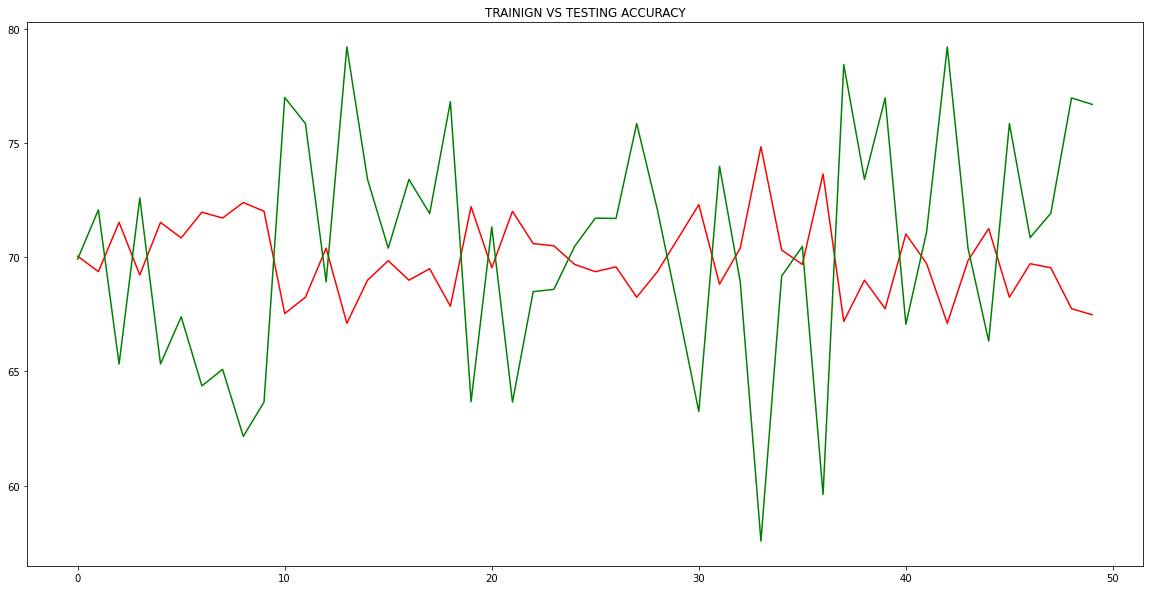

In [596]:
plt.figure(figsize=(20,10))
plt.title("TRAINIGN VS TESTING ACCURACY")
sns.lineplot(x=x,y=dtraining_scores,color="red")
sns.lineplot(x=x,y=dtesting_scores,color="green")

<AxesSubplot:title={'center':'R2 SCORE VARY WITH RANDOM STATE'}>

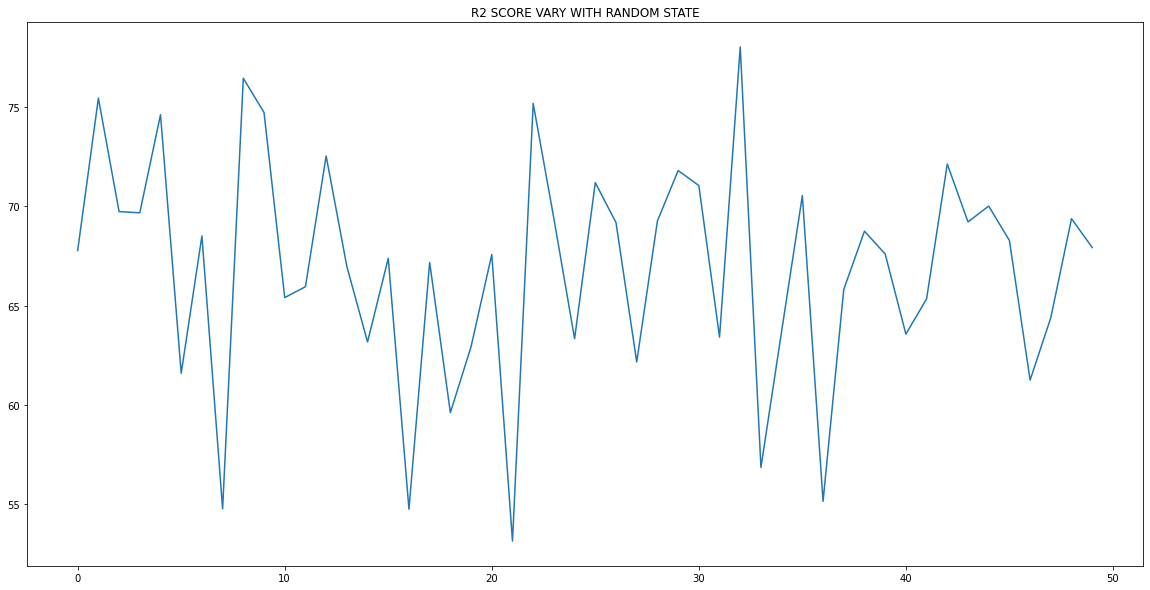

In [600]:
plt.figure(figsize=(20,10))
plt.title("R2 SCORE VARY WITH RANDOM STATE")
sns.lineplot(x=x,y=dscores)

## accuracy around 65%

## NOW I WILL TRY RANDOM FOREST

In [601]:
from sklearn.ensemble import RandomForestRegressor

In [610]:
def forest(final,y,i):
    X_train,X_test,y_train,y_test=train_test_split(final,y,test_size=.25,random_state=i)
    model=RandomForestRegressor(criterion= 'absolute_error', max_depth= 7, min_samples_leaf= 6, min_samples_split= 4)
    model.fit(X_train,y_train)
    print("HOW MY MODEL FITTED TO TRAINING DATA")
    print(100*model.score(X_train,y_train))
    print("HOW MY MODEL FITTED TO TESTING DATA")
    print(100*model.score(X_test,y_test))
  
    print("ACCURACY:",100*r2_score(y_test,model.predict(X_test)))
    
    param={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
       'splitter':['best', 'random'],
        'max_depth':np.arange(1,15),
        'min_samples_split':np.arange(2,10),
        "min_samples_leaf":np.arange(2,10),
    }
        
                 
 
    

In [611]:
forest(final,y,i)

HOW MY MODEL FITTED TO TRAINING DATA
70.64188578323767
HOW MY MODEL FITTED TO TESTING DATA
72.75447899012464
ACCURACY: 72.75447899012464


##  BY USING random forest i am getting accuracy upto 72-73

## please suggest me right way to increase the performance of model

In [629]:
def WithUsingSimpleLabelEncoding(new_df):
    new_df.sex.str.replace("male",1)
    new_df.sex.str.replace("female",0)
    new_df.smoker.str.replace("yes",1)
    new_df.smoker.str.replace("no",0)
    new_df.region.str.replace("northwest",0)
    new_df.region.str.replace("southwest",1)
    new_df.region.str.replace("northeast",2)
    new_df.region.str.replace("southeast",3)
    new_df.children=new_df.children.astype("int")
    Linear(new_df.iloc[:,:-1],new_df["charges"],6)
    

In [630]:
WithUsingSimpleLabelEncoding(new_df)

TypeError: repl must be a string or callable

In [622]:

new_df.sex.str.replace({"male":1,"female":0})
new_df.smoker.str.replace({"yes":1,"no":0})
new_df.region.str.replace({"northwest":0,"southwest":1,"northeast":2,"southeast":3})
new_df.children=new_df.children.astype("int")
Linear(new_df.iloc[:,:-1],new_df["charges"],6)

TypeError: replace() missing 1 required positional argument: 'repl'